# Optimizing delivery with Reinforcement Learning

![](http://img.chefdentreprise.com/Img/BREVE/2018/3/328332/recette-nestor-atteindre-rentabilite-F.jpg)

In [1]:
# Base Data Science snippet
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import time
from tqdm import tqdm_notebook

%matplotlib inline
%load_ext autoreload
%autoreload 2

# Environment definition
As for any RL problem, an environment must be designed where the Agent will evolve.<br>
For convenience and readability, we will define it like OpenAI Gym environments

In [3]:
from delivery import *

Initialized Delivery Environment with 10 random stops
Target metric for optimization is distance


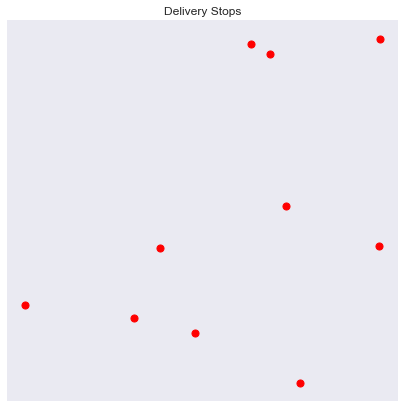

In [54]:
env = DeliveryEnvironment(n_stops = 10)

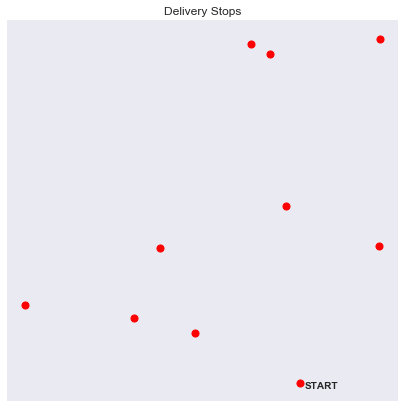

In [55]:
env.render()

In [56]:
env.stops

[8]

In [58]:
for i in [0,1,2,3]:
    env.step(i)

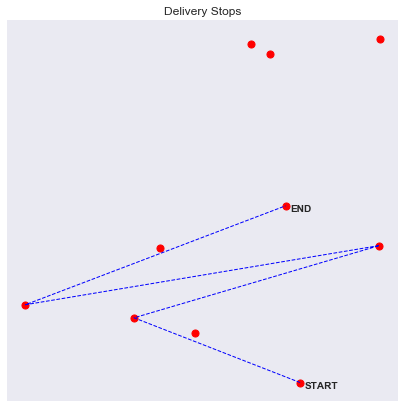

In [59]:
env.render()

# Q Learning

In [4]:
import sys
sys.path.append("../")

from delivery import run_episode,DeliveryQAgent,run_n_episodes

## Simple case

Initialized Delivery Environment with 500 random stops
Target metric for optimization is distance


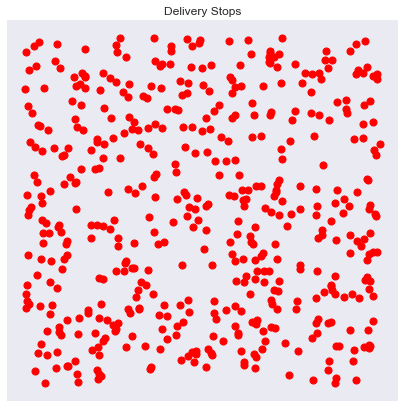

In [27]:
env = DeliveryEnvironment(n_stops = 500,method = "distance")

In [28]:
agent = DeliveryQAgent(env.observation_space,env.action_space)

HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

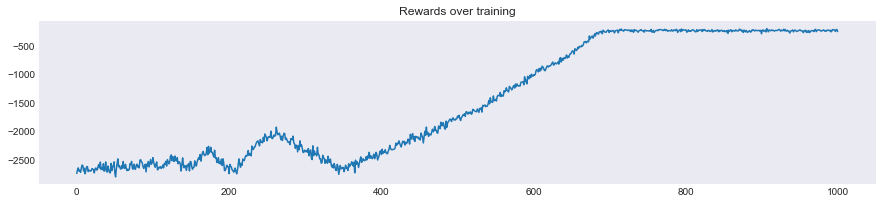

(<delivery.DeliveryEnvironment at 0x176d62510f0>,
 <delivery.DeliveryQAgent at 0x176e5a48630>)

In [29]:
run_n_episodes(env,agent,"training_500_stops.gif")

## Traffic case

Initialized Delivery Environment with 100 random stops
Target metric for optimization is traffic_box


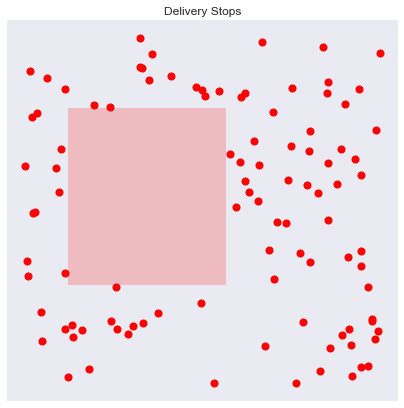

In [24]:
env = DeliveryEnvironment(n_stops = 100,method = "traffic_box",box_size = 0.6,traffic_intensity = 100)

In [25]:
agent = DeliveryQAgent(env.observation_space,env.action_space)

HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

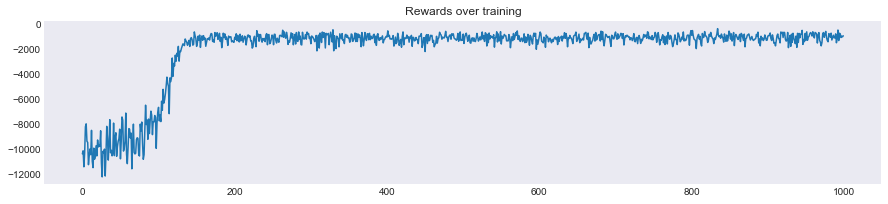

(<delivery.DeliveryEnvironment at 0x176d60a0da0>,
 <delivery.DeliveryQAgent at 0x176d7660898>)

In [26]:
run_n_episodes(env,agent,"training_100_stops_traffic.gif")